In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
%matplotlib inline

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [85]:
batch_size = 32
img_height = 224
img_width = 224

In [63]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [64]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [65]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


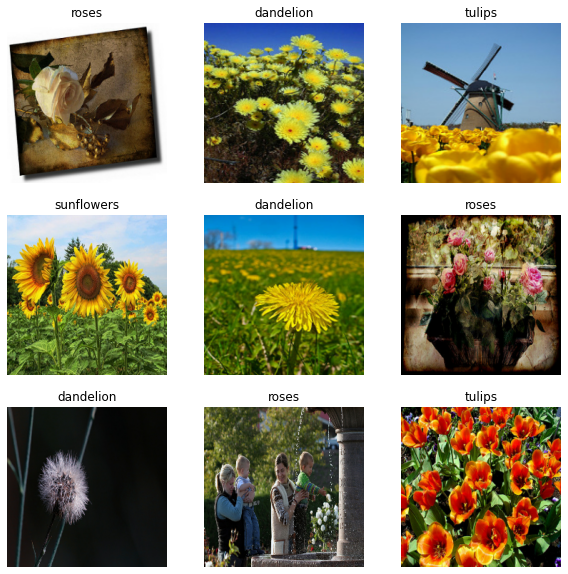

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [67]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [68]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [69]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9763608


In [70]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#**MODEL-1**

In [71]:
num_classes = 5

model1 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dense(num_classes, activation='softmax')
])



In [72]:
model1.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [73]:
model1.fit(
  train_ds,
  validation_data=val_ds,
  validation_batch_size=batch_size,
  epochs=20,verbose=2
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


92/92 - 10s - loss: 1.2696 - accuracy: 0.4768 - val_loss: 1.0597 - val_accuracy: 0.6035
Epoch 2/20
92/92 - 6s - loss: 0.9656 - accuracy: 0.6257 - val_loss: 0.9964 - val_accuracy: 0.6131
Epoch 3/20
92/92 - 6s - loss: 0.8031 - accuracy: 0.6921 - val_loss: 0.9215 - val_accuracy: 0.6471
Epoch 4/20
92/92 - 6s - loss: 0.6026 - accuracy: 0.7824 - val_loss: 0.9979 - val_accuracy: 0.6390
Epoch 5/20
92/92 - 6s - loss: 0.4469 - accuracy: 0.8389 - val_loss: 1.4620 - val_accuracy: 0.5749
Epoch 6/20
92/92 - 6s - loss: 0.3936 - accuracy: 0.8590 - val_loss: 1.3664 - val_accuracy: 0.6281
Epoch 7/20
92/92 - 6s - loss: 0.3197 - accuracy: 0.8896 - val_loss: 1.3821 - val_accuracy: 0.6172
Epoch 8/20
92/92 - 6s - loss: 0.1318 - accuracy: 0.9554 - val_loss: 1.9566 - val_accuracy: 0.6172
Epoch 9/20
92/92 - 6s - loss: 0.0722 - accuracy: 0.9789 - val_loss: 2.2403 - val_accuracy: 0.6131
Epoch 10/20
92/92 - 6s - loss: 0.0574 - accuracy: 0.9826 - val_loss: 2.3458 - val_accuracy: 0.6117
Epoch 11/20
92/92 - 6s - loss

In [78]:
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 26, 26, 32)       

In [79]:
model1.save_weights('/content/drive/MyDrive/Colab Notebooks/Flower_classification_CNN_project/model1_best.h5')

In [80]:
score_train = model1.evaluate(train_ds, verbose=2)
accuracy_train = 100*score_train[1]

print('Train accuracy = %.4f%% ' % accuracy_train)

92/92 - 2s - loss: 2.3264e-04 - accuracy: 1.0000
Train accuracy = 100.0000% 


In [81]:
score_val = model1.evaluate(val_ds, verbose=2)
accuracy_val = 100*score_val[1]


print('Validate accuracy = %.4f%% ' % accuracy_val)

23/23 - 1s - loss: 3.1516 - accuracy: 0.6444
Validate accuracy = 64.4414% 


#**MODEL-2**

In [82]:
num_classes = 5

model2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),

  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [83]:
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [84]:
model2.fit(
  train_ds,
  validation_data=val_ds,
  validation_batch_size=batch_size,
  epochs=20,verbose=2
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


92/92 - 46s - loss: 1.4684 - accuracy: 0.3423 - val_loss: 1.3945 - val_accuracy: 0.4332
Epoch 2/20
92/92 - 35s - loss: 1.2278 - accuracy: 0.4915 - val_loss: 1.1907 - val_accuracy: 0.5095
Epoch 3/20
92/92 - 35s - loss: 1.0832 - accuracy: 0.5640 - val_loss: 1.0863 - val_accuracy: 0.5654
Epoch 4/20
92/92 - 35s - loss: 0.9600 - accuracy: 0.6277 - val_loss: 1.0833 - val_accuracy: 0.5763
Epoch 5/20
92/92 - 35s - loss: 0.8372 - accuracy: 0.6761 - val_loss: 1.3466 - val_accuracy: 0.5708
Epoch 6/20
92/92 - 35s - loss: 0.7120 - accuracy: 0.7391 - val_loss: 1.1536 - val_accuracy: 0.6008
Epoch 7/20
92/92 - 35s - loss: 0.6195 - accuracy: 0.7762 - val_loss: 1.3818 - val_accuracy: 0.5940
Epoch 8/20
92/92 - 35s - loss: 0.4902 - accuracy: 0.8358 - val_loss: 2.1852 - val_accuracy: 0.5722
Epoch 9/20
92/92 - 35s - loss: 0.3437 - accuracy: 0.8781 - val_loss: 2.0977 - val_accuracy: 0.5763
Epoch 10/20
92/92 - 35s - loss: 0.3296 - accuracy: 0.8985 - val_loss: 2.3704 - val_accuracy: 0.5490
Epoch 11/20
92/92 - 

In [24]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)       

In [25]:
model2.save_weights('/content/drive/MyDrive/Colab Notebooks/Flower_classification_CNN_project/model2_best.h5')

In [26]:
score_train = model2.evaluate(train_ds, verbose=2)
accuracy_train = 100*score_train[1]

print('Train accuracy = %.4f%% ' % accuracy_train)

92/92 - 5s - loss: 0.2098 - accuracy: 0.9462
Train accuracy = 94.6185% 


In [27]:
score_val = model2.evaluate(val_ds, verbose=2)
accuracy_val = 100*score_val[1]

print('Validate accuracy = %.4f%% ' % accuracy_val)

23/23 - 1s - loss: 3.9065 - accuracy: 0.5504
Validate accuracy = 55.0409% 


#**MODEL-3**

In [28]:
num_classes = 5

model3 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),

  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [29]:
model3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [30]:
model3.fit(
  train_ds,
  validation_data=val_ds,
  validation_batch_size=batch_size,
  epochs=20,verbose=2
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


92/92 - 22s - loss: 1.5206 - accuracy: 0.4346 - val_loss: 1.5903 - val_accuracy: 0.2670
Epoch 2/20
92/92 - 18s - loss: 1.1400 - accuracy: 0.5361 - val_loss: 1.5737 - val_accuracy: 0.2766
Epoch 3/20
92/92 - 18s - loss: 1.0478 - accuracy: 0.5845 - val_loss: 1.5283 - val_accuracy: 0.2561
Epoch 4/20
92/92 - 18s - loss: 0.9680 - accuracy: 0.6243 - val_loss: 1.3984 - val_accuracy: 0.3597
Epoch 5/20
92/92 - 18s - loss: 0.7679 - accuracy: 0.7088 - val_loss: 1.7317 - val_accuracy: 0.3188
Epoch 6/20
92/92 - 18s - loss: 0.6058 - accuracy: 0.7837 - val_loss: 2.4593 - val_accuracy: 0.3910
Epoch 7/20
92/92 - 18s - loss: 0.5154 - accuracy: 0.8229 - val_loss: 2.9822 - val_accuracy: 0.3134
Epoch 8/20
92/92 - 18s - loss: 0.4392 - accuracy: 0.8566 - val_loss: 7.2590 - val_accuracy: 0.2493
Epoch 9/20
92/92 - 18s - loss: 0.3255 - accuracy: 0.8893 - val_loss: 5.6469 - val_accuracy: 0.3474
Epoch 10/20
92/92 - 18s - loss: 0.2326 - accuracy: 0.9257 - val_loss: 5.4363 - val_accuracy: 0.4373
Epoch 11/20
92/92 - 

In [31]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 75, 75, 64)       

In [32]:
model3.save_weights('/content/drive/MyDrive/Colab Notebooks/Flower_classification_CNN_project/model3_best.h5')

In [33]:
score_train = model3.evaluate(train_ds, verbose=2)
accuracy_train = 100*score_train[1]
print('Train accuracy = %.4f%% ' % accuracy_train)

score_val = model3.evaluate(val_ds, verbose=2)
accuracy_val = 100*score_val[1]
print('Validate accuracy = %.4f%% ' % accuracy_val)

92/92 - 5s - loss: 0.4625 - accuracy: 0.9162
Train accuracy = 91.6213% 
23/23 - 1s - loss: 4.7992 - accuracy: 0.4796
Validate accuracy = 47.9564% 


#**MODEL-4**

In [34]:
num_classes = 5

model4 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),

  tf.keras.layers.Conv2D(32, 3, padding='valid', activation='relu'),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.1),

  tf.keras.layers.Conv2D(64, 3,  padding='valid', activation='relu'),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.1),  

  tf.keras.layers.Conv2D(128, 3,  padding='valid', activation='relu'),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),

  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.1),   

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [35]:
model4.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])



In [36]:
model4.fit(
  train_ds,
  validation_data=val_ds,
  validation_batch_size=batch_size,
  epochs=20,verbose=2
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


92/92 - 23s - loss: 3.4817 - accuracy: 0.2183 - val_loss: 1.6781 - val_accuracy: 0.2357
Epoch 2/20
92/92 - 18s - loss: 1.4759 - accuracy: 0.3079 - val_loss: 1.7203 - val_accuracy: 0.1757
Epoch 3/20
92/92 - 18s - loss: 1.4220 - accuracy: 0.3457 - val_loss: 1.6333 - val_accuracy: 0.1785
Epoch 4/20
92/92 - 18s - loss: 1.3732 - accuracy: 0.3730 - val_loss: 1.4069 - val_accuracy: 0.2629
Epoch 5/20
92/92 - 18s - loss: 1.3286 - accuracy: 0.4019 - val_loss: 1.5676 - val_accuracy: 0.2180
Epoch 6/20
92/92 - 18s - loss: 1.2765 - accuracy: 0.4305 - val_loss: 1.7433 - val_accuracy: 0.2166
Epoch 7/20
92/92 - 18s - loss: 1.2600 - accuracy: 0.4421 - val_loss: 1.4247 - val_accuracy: 0.3665
Epoch 8/20
92/92 - 18s - loss: 1.2359 - accuracy: 0.4656 - val_loss: 1.2914 - val_accuracy: 0.4033
Epoch 9/20
92/92 - 18s - loss: 1.1541 - accuracy: 0.4908 - val_loss: 1.2925 - val_accuracy: 0.4278
Epoch 10/20
92/92 - 18s - loss: 1.1485 - accuracy: 0.5048 - val_loss: 1.2760 - val_accuracy: 0.4905
Epoch 11/20
92/92 - 

In [37]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 148, 148, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 148, 148, 32)      128       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)       

In [38]:
model4.save_weights('/content/drive/MyDrive/Colab Notebooks/Flower_classification_CNN_project/model4_best.h5')

In [39]:
score_train = model4.evaluate(train_ds, verbose=2)
accuracy_train = 100*score_train[1]
print('Train accuracy = %.4f%% ' % accuracy_train)

score_val = model4.evaluate(val_ds, verbose=2)
accuracy_val = 100*score_val[1]
print('Validate accuracy = %.4f%% ' % accuracy_val)

92/92 - 5s - loss: 1.0586 - accuracy: 0.5940
Train accuracy = 59.4005% 
23/23 - 1s - loss: 1.3428 - accuracy: 0.5627
Validate accuracy = 56.2670% 


#**MODEL-5**


In [40]:
num_classes = 5

model5 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),

  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(64, 3,  padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.Conv2D(256, 3,  padding='same', activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Flatten(),

  tf.keras.layers.Dense(128, activation='relu'),

  tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [41]:
model5.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])



In [ ]:
model5.fit(
  train_ds,
  validation_data=val_ds,
  validation_batch_size=batch_size,
  epochs=20,verbose=2
)

In [ ]:
model5.summary()

In [44]:
model5.save_weights('/content/drive/MyDrive/Colab Notebooks/Flower_classification_CNN_project/model5_best.h5')

In [45]:
score_train = model5.evaluate(train_ds, verbose=2)
accuracy_train = 100*score_train[1]
print('Train accuracy = %.4f%% ' % accuracy_train)

score_val = model5.evaluate(val_ds, verbose=2)
accuracy_val = 100*score_val[1]
print('Validate accuracy = %.4f%% ' % accuracy_val)

92/92 - 8s - loss: 1.3804 - accuracy: 0.3719
Train accuracy = 37.1935% 
23/23 - 2s - loss: 1.5560 - accuracy: 0.3420
Validate accuracy = 34.1962% 


#**Pretrained Model-1 (MobileNetV2)**

In [56]:
IMAGE_SIZE = [150,150]
MobileNetV2_model = tf.keras.applications.MobileNetV2(input_shape=[*IMAGE_SIZE, 3], include_top=False)
MobileNetV2_model.trainable=False


In [57]:
model6 = tf.keras.Sequential([MobileNetV2_model,
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(5, activation='softmax')                             
])

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model6.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten_7 (Flatten)          (None, 32000)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 5)                 160005    
Total params: 2,417,989
Trainable params: 160,005
Non-trainable params: 2,257,984
_________________________________________________________________


In [59]:
model6.fit(
  train_ds,
  validation_data=val_ds,
  validation_batch_size=batch_size,
  epochs=20,verbose=2
)

Epoch 1/20
92/92 - 7s - loss: 0.7310 - accuracy: 0.7895 - val_loss: 1.9482 - val_accuracy: 0.5640
Epoch 2/20
92/92 - 7s - loss: 0.4224 - accuracy: 0.8542 - val_loss: 2.5621 - val_accuracy: 0.5286
Epoch 3/20
92/92 - 6s - loss: 0.3359 - accuracy: 0.8924 - val_loss: 2.5207 - val_accuracy: 0.5545
Epoch 4/20
92/92 - 7s - loss: 0.1809 - accuracy: 0.9336 - val_loss: 2.1082 - val_accuracy: 0.5777
Epoch 5/20
92/92 - 7s - loss: 0.0727 - accuracy: 0.9762 - val_loss: 1.9990 - val_accuracy: 0.5899
Epoch 6/20
92/92 - 6s - loss: 0.0314 - accuracy: 0.9928 - val_loss: 2.0666 - val_accuracy: 0.5736
Epoch 7/20
92/92 - 6s - loss: 0.0102 - accuracy: 1.0000 - val_loss: 1.9666 - val_accuracy: 0.5831
Epoch 8/20
92/92 - 7s - loss: 0.0061 - accuracy: 1.0000 - val_loss: 1.9352 - val_accuracy: 0.6008
Epoch 9/20
92/92 - 6s - loss: 0.0047 - accuracy: 1.0000 - val_loss: 1.9357 - val_accuracy: 0.6049
Epoch 10/20
92/92 - 6s - loss: 0.0042 - accuracy: 1.0000 - val_loss: 1.9255 - val_accuracy: 0.6008
Epoch 11/20
92/92 -

In [60]:
model6.save_weights('/content/drive/MyDrive/Colab Notebooks/Flower_classification_CNN_project/model6_best.h5')

In [61]:
score_train = model6.evaluate(train_ds, verbose=2)
accuracy_train = 100*score_train[1]
print('Train accuracy = %.4f%% ' % accuracy_train)

score_val = model6.evaluate(val_ds, verbose=2)
accuracy_val = 100*score_val[1]
print('Validate accuracy = %.4f%% ' % accuracy_val)

92/92 - 6s - loss: 0.0021 - accuracy: 1.0000
Train accuracy = 100.0000% 
23/23 - 1s - loss: 1.9682 - accuracy: 0.6063
Validate accuracy = 60.6267% 


#**Pretrained Model-2 (VGG16)**

In [96]:
GCS_PATTERN = 'gs://flowers-public/tfrecords-jpeg-192x192-2/*.tfrec'
IMAGE_SIZE = [192, 192]

BATCH_SIZE = 32
EPOCHS = 10

VALIDATION_SPLIT = 0.20
CLASSES = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] 

# splitting data files between training and validation
filenames = tf.io.gfile.glob(GCS_PATTERN)
split = int(len(filenames) * VALIDATION_SPLIT)
training_filenames = filenames[split:]
validation_filenames = filenames[:split]
print("Pattern matches {} data files. Splitting dataset into {} training files and {} validation files".format(len(filenames), len(training_filenames), len(validation_filenames)))
validation_steps = int(3670 // len(filenames) * len(validation_filenames)) // BATCH_SIZE
steps_per_epoch = int(3670 // len(filenames) * len(training_filenames)) // BATCH_SIZE
print("With a batch size of {}, there will be {} batches per training epoch and {} batch(es) per validation run.".format(BATCH_SIZE, steps_per_epoch, validation_steps))

Pattern matches 16 data files. Splitting dataset into 13 training files and 3 validation files
With a batch size of 32, there will be 93 batches per training epoch and 21 batch(es) per validation run.


In [98]:
def dataset_to_numpy_util(dataset, N):
  dataset = dataset.batch(N)
  
  for images, labels in dataset:
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()
    break;

  return numpy_images, numpy_labels

def title_from_label_and_target(label, correct_label):
  correct = (label == correct_label)
  return "{} [{}{}{}]".format(CLASSES[label], str(correct), ', shoud be ' if not correct else '',
                              CLASSES[correct_label] if not correct else ''), correct

def display_one_flower(image, title, subplot, red=False):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image)
    plt.title(title, fontsize=16, color='red' if red else 'black')
    return subplot+1
  
def display_9_images_from_dataset(dataset):
  subplot=331
  plt.figure(figsize=(13,13))
  images, labels = dataset_to_numpy_util(dataset, 9)
  for i, image in enumerate(images):
    title = CLASSES[labels[i]]
    subplot = display_one_flower(image, title, subplot)
    if i >= 8:
      break;
              
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()
  
def display_9_images_with_predictions(images, predictions, labels):
  subplot=331
  plt.figure(figsize=(13,13))
  classes = np.argmax(predictions, axis=-1)
  for i, image in enumerate(images):
    title, correct = title_from_label_and_target(classes[i], labels[i])
    subplot = display_one_flower(image, title, subplot, not correct)
    if i >= 8:
      break;
              
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()
  
def display_training_curves(training, validation, title, subplot):
  if subplot%10==1: 
    plt.subplots(figsize=(10,10), facecolor='#F0F0F0')

  ax = plt.subplot(subplot)
  ax.set_facecolor('#F8F8F8')
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['train', 'valid.'])

In [99]:
def read_tfrecord(example):
    features = {
        "image": tf.io.FixedLenFeature([], tf.string), 
        "class": tf.io.FixedLenFeature([], tf.int64),  
    }
    example = tf.io.parse_single_example(example, features)
    image = tf.io.decode_jpeg(example['image'], channels=3)
    image = tf.cast(image, tf.float32) / 255.0  
    image = tf.reshape(image, [*IMAGE_SIZE, 3]) 
    class_label = example['class']
    return image, class_label

def load_dataset(filenames):

  option_no_order = tf.data.Options()
  option_no_order.experimental_deterministic = False

  dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTOTUNE)
  dataset = dataset.with_options(option_no_order)
  dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTOTUNE)
  return dataset

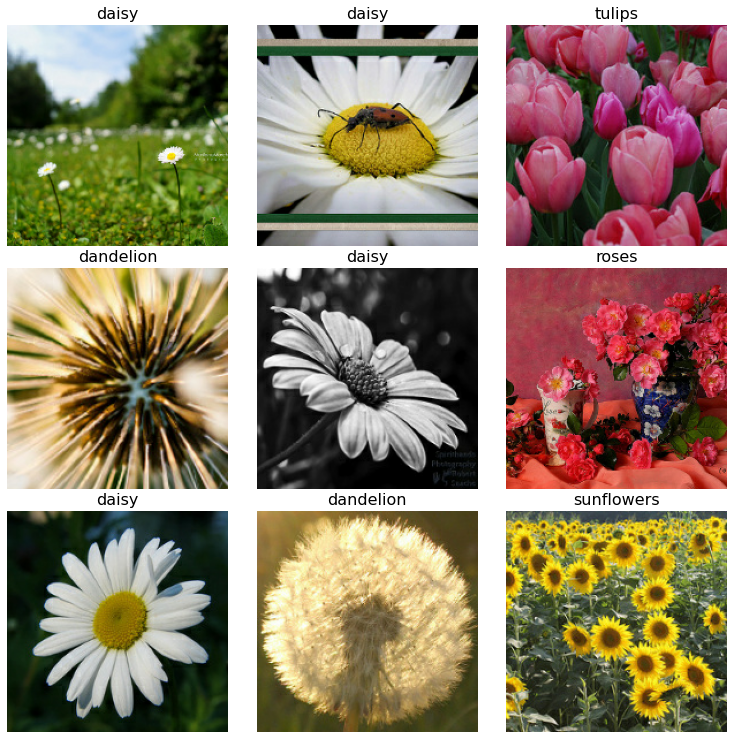

In [100]:
display_9_images_from_dataset(load_dataset(training_filenames))

In [102]:
def get_batched_dataset(filenames, train=False):
  dataset = load_dataset(filenames)
  dataset = dataset.cache() 
  if train:    
    dataset = dataset.repeat()
  dataset = dataset.batch(BATCH_SIZE)
  dataset = dataset.prefetch(AUTOTUNE) 
  return dataset
  

# instantiate the datasets
training_dataset = get_batched_dataset(training_filenames, train=True)
validation_dataset = get_batched_dataset(validation_filenames, train=False)

In [115]:
pretrained_model_VGG16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMAGE_SIZE, 3])
pretrained_model_VGG16.trainable = False

model7 = tf.keras.Sequential([
    pretrained_model_VGG16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(5, activation='softmax')
])

model7.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model7.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_14 (Flatten)         (None, 18432)             0         
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 92165     
Total params: 14,806,853
Trainable params: 92,165
Non-trainable params: 14,714,688
_________________________________________________________________


In [116]:
history = model7.fit(training_dataset, steps_per_epoch=steps_per_epoch, epochs=20,
                    validation_data=validation_dataset, validation_steps=validation_steps)

Epoch 1/20
93/93 [==============================] - 22s 230ms/step - loss: 0.8192 - accuracy: 0.7110 - val_loss: 0.6682 - val_accuracy: 0.7574
Epoch 2/20
93/93 [==============================] - 21s 228ms/step - loss: 0.3437 - accuracy: 0.8938 - val_loss: 0.6885 - val_accuracy: 0.7604
Epoch 3/20
93/93 [==============================] - 21s 227ms/step - loss: 0.2341 - accuracy: 0.9308 - val_loss: 0.5248 - val_accuracy: 0.8229
Epoch 4/20
93/93 [==============================] - 21s 227ms/step - loss: 0.1751 - accuracy: 0.9466 - val_loss: 0.5327 - val_accuracy: 0.8244
Epoch 5/20
93/93 [==============================] - 21s 226ms/step - loss: 0.0954 - accuracy: 0.9758 - val_loss: 0.5630 - val_accuracy: 0.8125
Epoch 6/20
93/93 [==============================] - 21s 228ms/step - loss: 0.0645 - accuracy: 0.9886 - val_loss: 0.5310 - val_accuracy: 0.8244
Epoch 7/20
93/93 [==============================] - 21s 226ms/step - loss: 0.0541 - accuracy: 0.9926 - val_loss: 0.5597 - val_accuracy: 0.8185

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


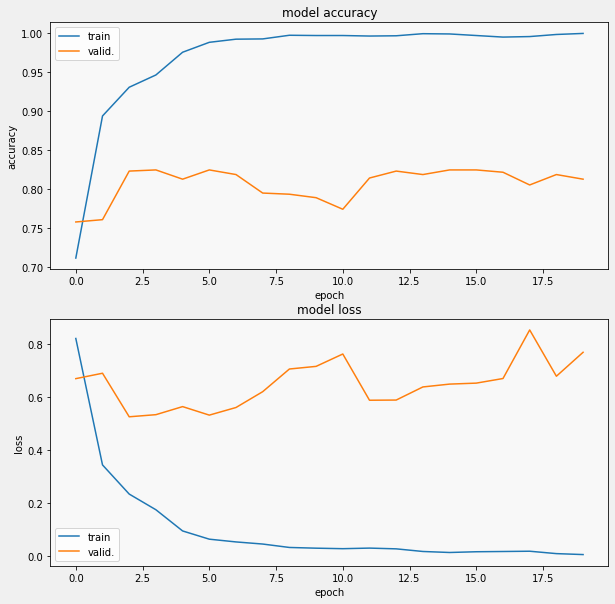

In [117]:
print(history.history.keys())
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [118]:
flowers, labels = dataset_to_numpy_util(load_dataset(validation_filenames).skip(np.random.randint(300)), 9)

predictions = model.predict(flowers, steps=1)
print(np.array(CLASSES)[np.argmax(predictions, axis=-1)].tolist())

['daisy', 'sunflowers', 'dandelion', 'dandelion', 'daisy', 'daisy', 'dandelion', 'roses', 'dandelion']


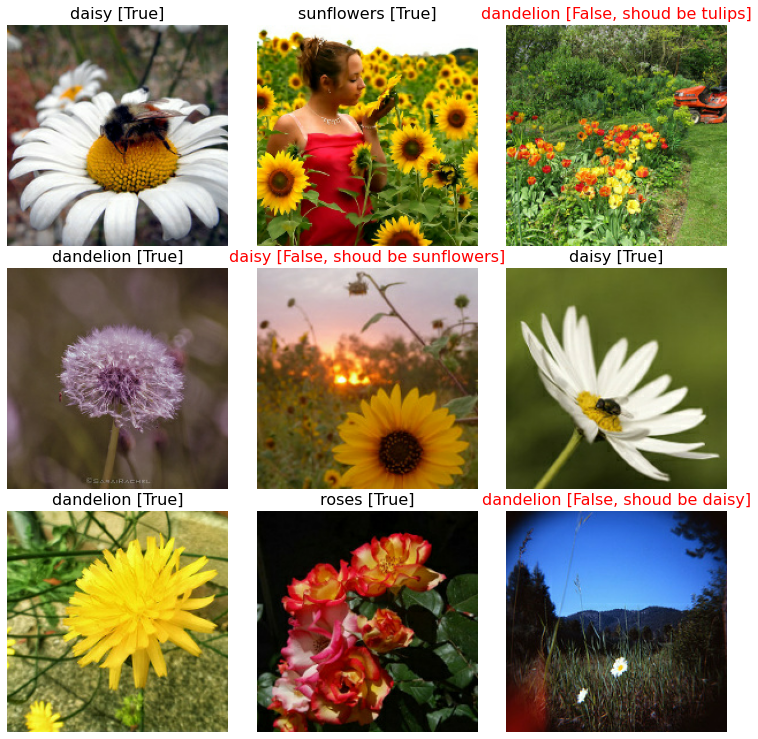

In [119]:
display_9_images_with_predictions(flowers, predictions, labels)

In [120]:
model7.save_weights('/content/drive/MyDrive/Colab Notebooks/Flower_classification_CNN_project/model7_best.h5')